<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Abstract

El Data set seleccionado de Kaggle contiene el consumo de café, el mismo fue modificado utilizando datos de los consumidores de Argentina.
En los últimos años se ha desarrollado la creación de cafés de especialidades, evidenciando de esta manera el aumento de consumo de este producto en los argentinos, se observa una evolución en los hábitos, con un crecimiento en el consumo fuera del hogar a través de cafeterías y estaciones de servicio, la expansión de formatos como las cápsulas y el auge del café de especialidad, que responde a consumidores más exigentes y consciente.

Para el análisis de este data set se han propuesto varios paradigmas, para verificar a que corresponde el aumento de consumo, analizando los lugares elegidos, las preferencias en cuanto al tipo de café, la hora más elegida en el momento de tomarlo  , se analizó si la profesión o la vocación de ellos ejercen poder en su elección , así como si las promociones están relacionadas con la elección de compra.

El café resiste: se adapta al precio, al cambio de rutinas y a las nuevas formas de consumo. Se transforma en un punto de encuentro, en una pausa necesaria o en una elección personal cargada de sentido.
A través de este análisis se busca crear conocimiento del consumidor típico de café, de manera de conocerlo y crear negocios inteligentes apuntando a las elecciones que se presentan con mayor frecuencia ,verificando cual es su principal motivo a la hora de comprar café.




**Preguntas:**

Las hipotesis parciales que vamos a responder en este trabajo atraves de la creacion de Graficos son las siguientes

1-¿Cuál es la Bebida mas elegida?

2-¿Cuál es el momento del dia elegido con mas frecuencia para el consumo de cafe?

3-¿Cual es el medio de Pago elegido?




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Data science/DATA SET CAFE.csv',sep=";")
df.columns = df.columns.str.strip()
print(df.columns.tolist())
modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


['Hora del dia', 'Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Momento del dia', 'Dia de la semana', 'Mes', 'Dia', 'Num de Mes', 'Date', 'Profesion']
0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte     

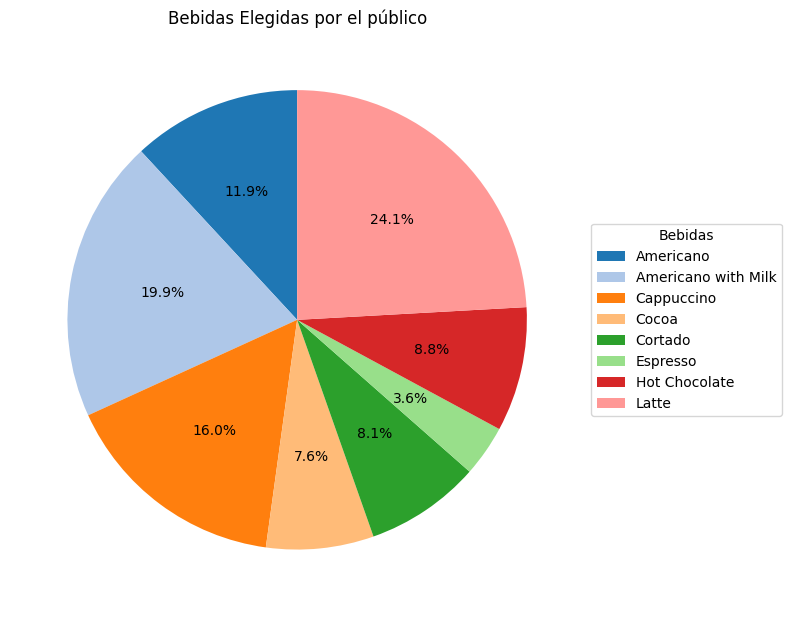

=== Resumen de gasto por bebida ===
Gasto total: 14023300.00 ARS
Bebida más consumida: Latte (3382000.00 ARS, 24.1%)
Bebida menos consumida: Espresso (505500.00 ARS, 3.6%)

Porcentaje de participación de cada bebida:
 - Americano: 1667000.00 ARS (11.9%)
 - Americano with Milk: 2795000.00 ARS (19.9%)
 - Cappuccino: 2244300.00 ARS (16.0%)
 - Cocoa: 1061500.00 ARS (7.6%)
 - Cortado: 1138500.00 ARS (8.1%)
 - Espresso: 505500.00 ARS (3.6%)
 - Hot Chocolate: 1229500.00 ARS (8.8%)
 - Latte: 3382000.00 ARS (24.1%)


In [ ]:

#GRAFICO UNIVARIADO TIPO DE BEBIDA ELEGIDA

import matplotlib.pyplot as plt

gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()

plt.figure(figsize=(8,8))
colors = plt.cm.tab20.colors  # paleta de colores

# Graficar pie chart
wedges, texts, autotexts = plt.pie(
    gasto_por_tienda,
    labels=None,  # quitamos las etiquetas directas
    autopct="%1.1f%%",
    startangle=90,
    colors=colors
)

# Añadir leyenda con nombres de bebidas
plt.legend(
    wedges,
    gasto_por_tienda.index,
    title="Bebidas",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Bebidas Elegidas por el público")
plt.tight_layout()
plt.show()

import pandas as pd

# Calcular gasto total por bebida
gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()
gasto_total = gasto_por_tienda.sum()

# Bebida más y menos consumida
max_bebida = gasto_por_tienda.idxmax()
min_bebida = gasto_por_tienda.idxmin()
max_valor = gasto_por_tienda.max()
min_valor = gasto_por_tienda.min()

print("=== Resumen de gasto por bebida ===")
print(f"Gasto total: {gasto_total:.2f} ARS")
print(f"Bebida más consumida: {max_bebida} ({max_valor:.2f} ARS, {100*max_valor/gasto_total:.1f}%)")
print(f"Bebida menos consumida: {min_bebida} ({min_valor:.2f} ARS, {100*min_valor/gasto_total:.1f}%)")
print("\nPorcentaje de participación de cada bebida:")
for bebida, valor in gasto_por_tienda.items():
    porcentaje = 100 * valor / gasto_total
    print(f" - {bebida}: {valor:.2f} ARS ({porcentaje:.1f}%)")



=== Resumen de gasto por hora ===
Hora con mayor gasto: 10 hs (1222700.00 ARS)
Hora con menor gasto: 6 hs (14700.00 ARS)
Gasto promedio por hora: 824900.00 ARS


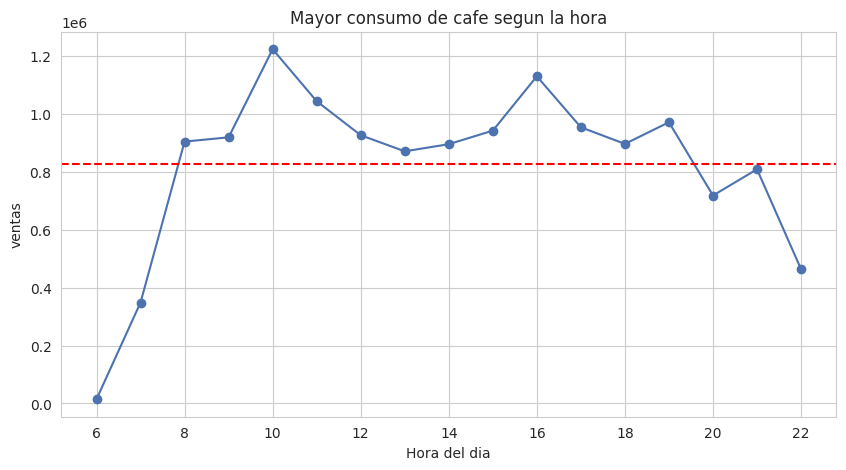

In [ ]:
#GRAFICO UNIVARIADO TEMPORAL  DIA Y HORA MAS ELEGIDOS

import plotly.express as px

gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)

import pandas as pd

# Agrupar gasto por hora
gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
hora_max = gasto_diario.idxmax()
hora_min = gasto_diario.idxmin()
max_valor = gasto_diario.max()
min_valor = gasto_diario.min()
gasto_total = gasto_diario.sum()

# Mostrar resumen
print("=== Resumen de gasto por hora ===")

print(f"Hora con mayor gasto: {hora_max} hs ({max_valor:.2f} ARS)")
print(f"Hora con menor gasto: {hora_min} hs ({min_valor:.2f} ARS)")
print(f"Gasto promedio por hora: {media_diaria:.2f} ARS")






In [ ]:
#GRAFICO MULTIVARIADO

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Data science/DATA SET CAFE.csv',sep=";")
df.columns = df.columns.str.strip()


# Agrupar frecuencia por Día, Hora y Momento
tabla = df.groupby(["Dia de la semana", "Hora del dia", "Momento del dia"]).size().reset_index(name="Frecuencia")

# Crear heatmap interactivo
fig = px.density_heatmap(
    tabla,
    x="Hora del dia",
    y="Dia de la semana",
    z="Frecuencia",
    color_continuous_scale="YlOrBr",
    facet_col="Momento del dia",  # divide por mañana, tarde, noche
    title="Frecuencia de compras por Hora, Día de la semana y Momento del día")
fig.show()
hora_max = tabla.loc[tabla["Frecuencia"].idxmax()]
print("Mayor concurrencia:", hora_max.to_dict())
dia_max = tabla.groupby("Dia de la semana")["Frecuencia"].sum().idxmax()
print("Dia con mayor concurrencia:", dia_max)
hora_min = tabla.loc[tabla["Frecuencia"].idxmin()]
print("Menor concurrencia:", hora_min.to_dict())
momento_max = tabla.groupby("Momento del dia")["Frecuencia"].sum().idxmax()
print("Momento con mayor concurrencia:", momento_max)







Mayor concurrencia: {'Dia de la semana': 'Tue', 'Hora del dia': 11, 'Momento del dia': 'Morning', 'Frecuencia': 56}
Dia con mayor concurrencia: Tue
Menor concurrencia: {'Dia de la semana': 'Mon', 'Hora del dia': 6, 'Momento del dia': 'Morning', 'Frecuencia': 2}
Momento con mayor concurrencia: Afternoon


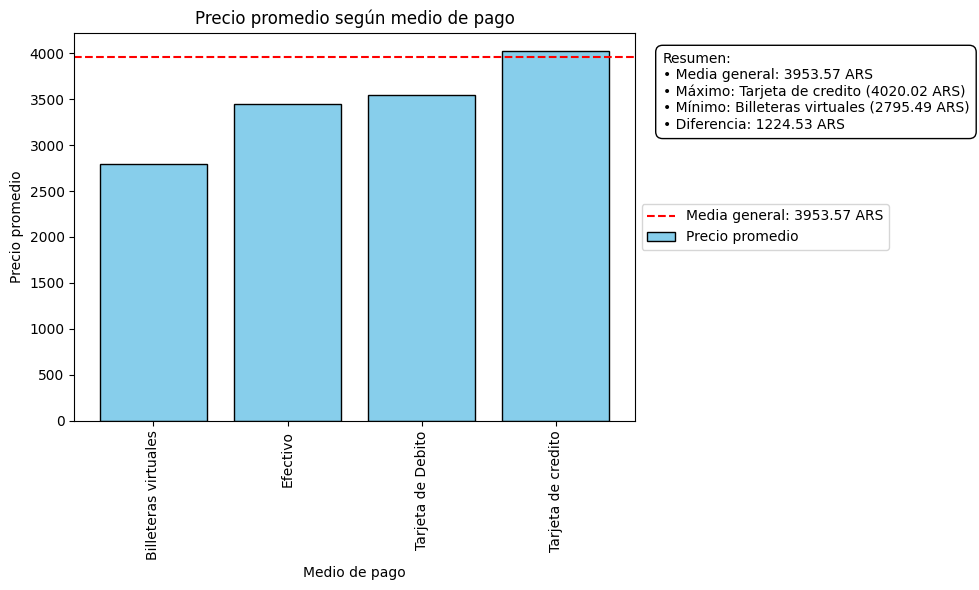

In [ ]:
#3- PREGUNTA ANALISIS DE PRECIO ATRAVES DE UN GRAFICO BIVARIADO

import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedios
promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

# Gráfico de barras con línea de la media general
plt.figure(figsize=(10,6))
bars = plt.bar(promedios.index, promedios.values, color="skyblue", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Resumen automático
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()

resumen = (
    f"Resumen:\n"
    f"• Media general: {media_general:.2f} ARS\n"
    f"• Máximo: {medio_max} ({precio_max:.2f} ARS)\n"
    f"• Mínimo: {medio_min} ({precio_min:.2f} ARS)\n"
    f"• Diferencia: {precio_max - precio_min:.2f} ARS"
)

# Añadir texto al gráfico (en un recuadro)
plt.gca().text(
    1.05, 0.95, resumen,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()


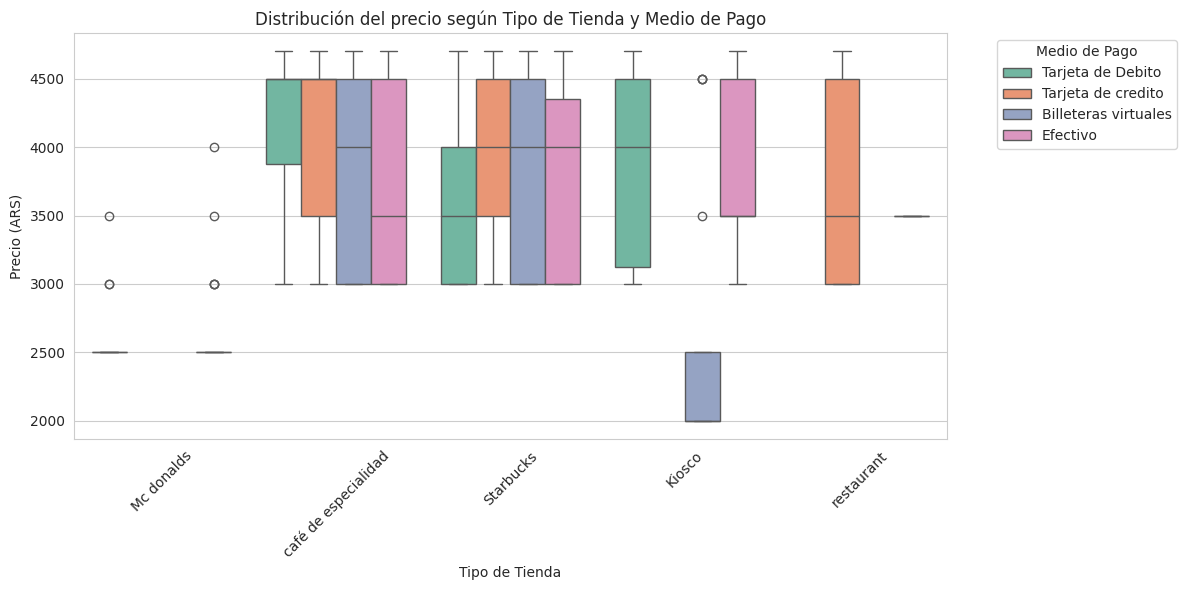

Precio máximo: 4700 ARS
Precio mínimo: 2000 ARS
Tienda más elegida: café de especialidad (2330 compras)
Tienda menos elegida: restaurant (33 compras)
Precio medio: 3953.57 ARS
Tienda más visitada (media): café de especialidad
=== Outliers del boxplot multivariado ===
   Tipo de Tienda         Medio de pago  Precio outlier
0          Kiosco  Billeteras virtuales            4500
1          Kiosco  Billeteras virtuales            4500
2          Kiosco  Billeteras virtuales            3500
3          Kiosco  Billeteras virtuales            4500
4      Mc donalds              Efectivo            4000
5      Mc donalds              Efectivo            3000
6      Mc donalds              Efectivo            3500
7      Mc donalds              Efectivo            3000
8      Mc donalds              Efectivo            3000
9      Mc donalds     Tarjeta de Debito            3500
10     Mc donalds     Tarjeta de Debito            3000
11     Mc donalds     Tarjeta de Debito            3000
=== 

In [ ]:

#GRAFICO MULTIVARIADO

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Tipo de Tienda",
    y="precio",
    hue="Medio de pago",
    data=df,
    palette="Set2")
plt.title("Distribución del precio según Tipo de Tienda y Medio de Pago")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio (ARS)")
plt.xticks(rotation=45)
plt.legend(title="Medio de Pago", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Agrupar por Tipo de Tienda y Medio de pago
grupos = df.groupby(["Tipo de Tienda", "Medio de pago"])

# Valor máximo y mínimo del precio
precio_max = df["precio"].max()
precio_min = df["precio"].min()
print(f"Precio máximo: {precio_max} ARS")
print(f"Precio mínimo: {precio_min} ARS")

# Tienda más y menos elegida
tienda_mas = frecuencia_tienda.idxmax()
tienda_menos = frecuencia_tienda.idxmin()
cant_mas = frecuencia_tienda.max()
cant_menos = frecuencia_tienda.min()

print(f"Tienda más elegida: {tienda_mas} ({cant_mas} compras)")
print(f"Tienda menos elegida: {tienda_menos} ({cant_menos} compras)")

# Precio medio
precio_medio = df["precio"].mean()

# Tienda más visitada (modo)
tienda_media = df["Tipo de Tienda"].mode()[0]

print(f"Precio medio: {precio_medio:.2f} ARS")
print(f"Tienda más visitada (media): {tienda_media}")

import pandas as pd

# Lista para almacenar outliers
outliers = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        for val in valores_fuera["precio"]:
            outliers.append({
                "Tipo de Tienda": tienda,
                "Medio de pago": medio,
                "Precio outlier": val
            })

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers)

print("=== Outliers del boxplot multivariado ===")
print(outliers_df)
import pandas as pd

# Lista para almacenar los outliers extremos
outliers_extremos = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        outliers_extremos.append({
            "Tipo de Tienda": tienda,
            "Medio de pago": medio,
            "Precio mínimo outlier": valores_fuera["precio"].min(),
            "Precio máximo outlier": valores_fuera["precio"].max()
        })

# Convertir a DataFrame
outliers_extremos_df = pd.DataFrame(outliers_extremos)

print("=== Valores más alejados (outliers extremos) ===")
print(outliers_extremos_df)





# **Conclusiones** **Preliminares**

Los resultados obtenidos son:

1.   La bebida mas elegida en el analisis es el **Latte**
2.   La hora del dia de **mas** consumo es entre **las 10 y la 11 de la mañana** y la de **menor** compra las **6 de la mañana**
3.   El dia con **mayor** frecuencia es el **Martes** y el de **menos** los **Lunes**.
4.   El **medio de pago **, para las bebidas mas caras es **la tarjeta de credito** y para importe menores es la **billetera virtual**
5.   El precio **promedio** esta entre los **3000 y 4000**
6.   La **tienda mas elegida** son l**os cafes de especialidad** y la **menos** elegidas son los **restaurant**.
7.   Entre los valores atipicos podemos ver los kioscos con precios de 4000 por bebida y el medio de pago menos frecuentes en los kioscos es el de billeteras virtuales.














